<h1>Import frameworks</h1>

In [1]:
from matplotlib import pyplot
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<h1>Correlation</h1>

In [2]:
def calculate_correlation(data, variable, method):
    # Compute Pearson correlation coefficients
    correlation_matrix = data.corr(method = method)

    # Extract correlation coefficients of the target variable (life expectancy)
    correlation_with_life_expectancy = correlation_matrix[variable]
    # Remove the target variable from the correlation coefficients
    correlation_without_life_expectancy = correlation_with_life_expectancy.drop(variable)

    # Find the variable with the highest absolute correlation coefficient
    strongest_correlation_variable = correlation_without_life_expectancy.abs().idxmax()
    strongest_correlation_coefficient = correlation_without_life_expectancy.abs().max()

    print(f"The variable '{strongest_correlation_variable}' has the strongest " + method + f" correlation with a coefficient of {strongest_correlation_coefficient:.2f}.")

    fig, ax = pyplot.subplots(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
    ax.set_title(method + ' Correlation Coefficients')
    fig.savefig(method + "_correlation.pdf", bbox_inches='tight')
    
    return strongest_correlation_variable, correlation_matrix

def specific_correlation(data, variable, specific_variable, method):
    # Compute Pearson correlation coefficients
    correlation_matrix = data.corr(method = method)

    # Extract correlation coefficients of the target variable (life expectancy)
    correlation_with_life_expectancy = correlation_matrix[variable]

    # Find the variable with the highest absolute correlation coefficient
    correlation_coffectient = correlation_with_life_expectancy[specific_variable]

    return correlation_coffectient

<h1>Train model</h1>

In [3]:
def train_linear_regression_model(X_train, X_test, y_train, y_test, variables, prefix = ''):
    # Train a linear regression model using the variable with the strongest correlation
    model = LinearRegression().fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    _, rows = X_test.shape
    if rows == 1:
        fig, ax = pyplot.subplots(figsize=(8, 6), layout='constrained')
        ax.scatter(X_test, y_test, color='blue')
        ax.scatter(X_test, y_pred, color='red')
        ax.set_xlabel(prefix + " " + variables)
        ax.set_ylabel('Life Expectancy (years)')
        ax.text(0.1, 0.7, f'R^2 = {r2:.2f}', ha='center', va='center', transform=ax.transAxes)
        filename = prefix + "_linear_regression_" + variables + ".pdf"
        filename = filename.replace(' ', '_').lower()
        fig.savefig(filename, bbox_inches='tight')
   

    mse = mean_squared_error(y_test, y_pred)
    print("Trained model with the following variables " + prefix + ": ", variables)
    print(f"The mean squared error for is {mse:.2f}.")
    print(f"The r2 score is {r2:.2f}.")
    print("Coefficients: ", model.coef_)



<h1>Find linear variable</h1>

In [4]:
def transform_variable(X_train, y_train, correlation_variable):
    pd.options.mode.chained_assignment = None

    X_train_selected = X_train[[correlation_variable]]

    X_train_selected['log'] = np.log(X_train[[correlation_variable]])
    X_train_selected['sqrt'] = np.sqrt(X_train[[correlation_variable]])
    X_train_selected['reciprocal'] = 1/(X_train[[correlation_variable]])

    fig, ax = pyplot.subplots(figsize=(8, 6), layout='constrained')
    ax.scatter(X_train_selected.iloc[:, 0], y_train, color='blue', label='Original')
    ax.scatter(X_train_selected['log'], y_train, color='red', label='Log')
    ax.scatter(X_train_selected['sqrt'], y_train, color='green', label='Square root')
    ax.scatter(X_train_selected['reciprocal'], y_train, color='black', label='Reciprocal')
    ax.set_ylabel('Life Expectancy (years)')
    ax.set_xlabel(correlation_variable)

    ax.legend()
    fig.savefig("linear_transformation.pdf", bbox_inches='tight')
   

<h1>Read csv, examine correlation and train models</h1>

The variable 'Human Development Index (value)' has the strongest pearson correlation with a coefficient of 0.92.
Trained model with the following variables :  Human Development Index (value)
The mean squared error for is 8.73.
The r2 score is 0.88.
Coefficients:  [48.32498353]
The variable 'Median Age, as of 1 July (years)' has the strongest spearman correlation with a coefficient of 0.92.
Trained model with the following variables :  Median Age, as of 1 July (years)
The mean squared error for is 13.69.
The r2 score is 0.81.
Coefficients:  [0.99135554]
Trained model with the following variables [Log]:  Median Age, as of 1 July (years)
The mean squared error for is 11.32.
The r2 score is 0.84.
Coefficients:  [25.50776457]
Trained model with the following variables [Sqrt]:  Median Age, as of 1 July (years)
The mean squared error for is 12.23.
The r2 score is 0.83.
Coefficients:  [10.18020433]
Trained model with the following variables [Reciprocal]:  Median Age, as of 1 July (years)
The m

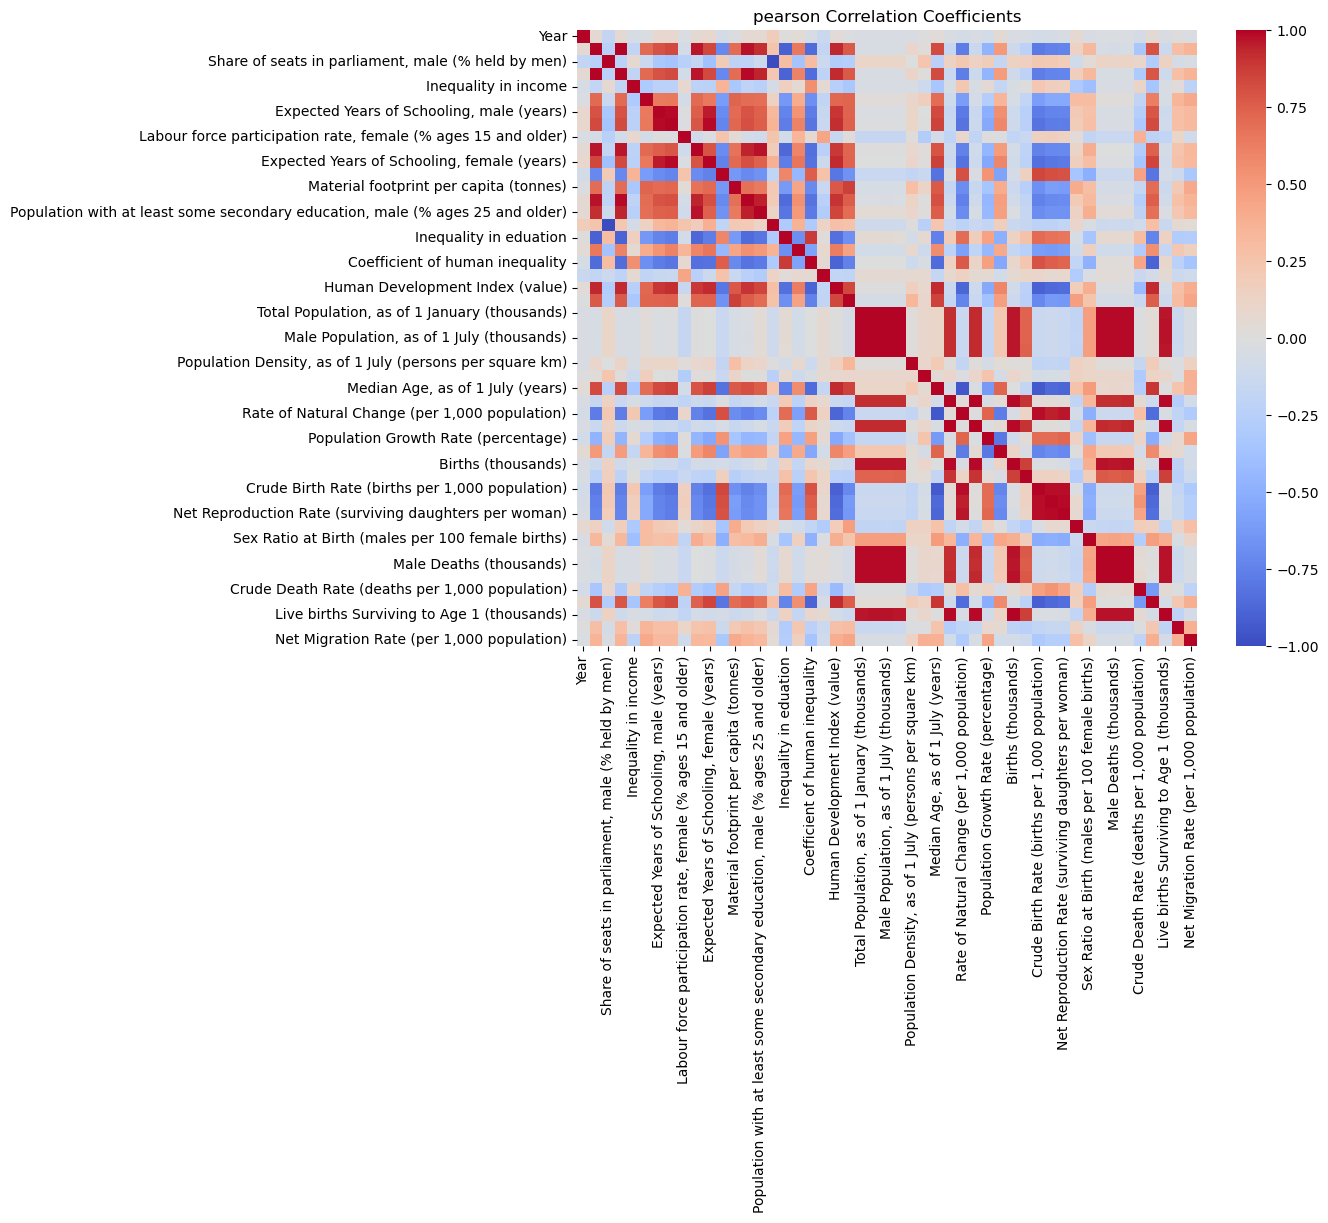

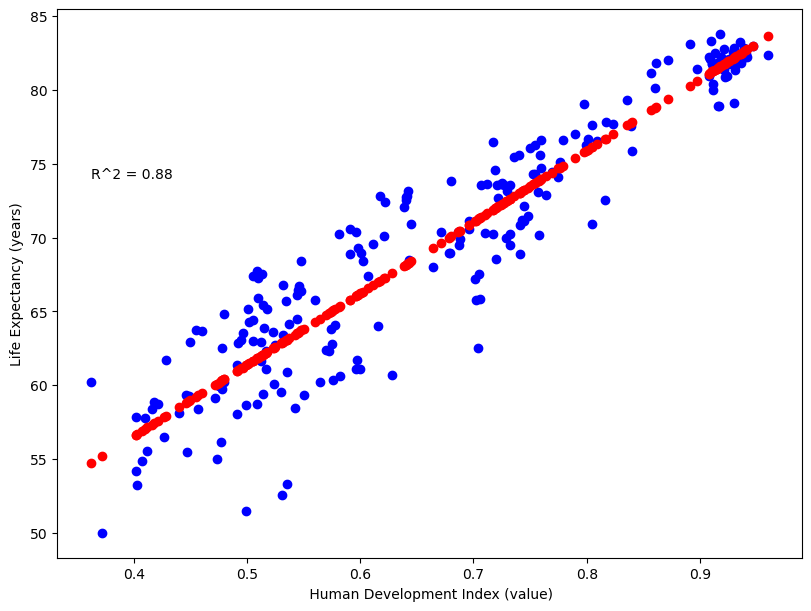

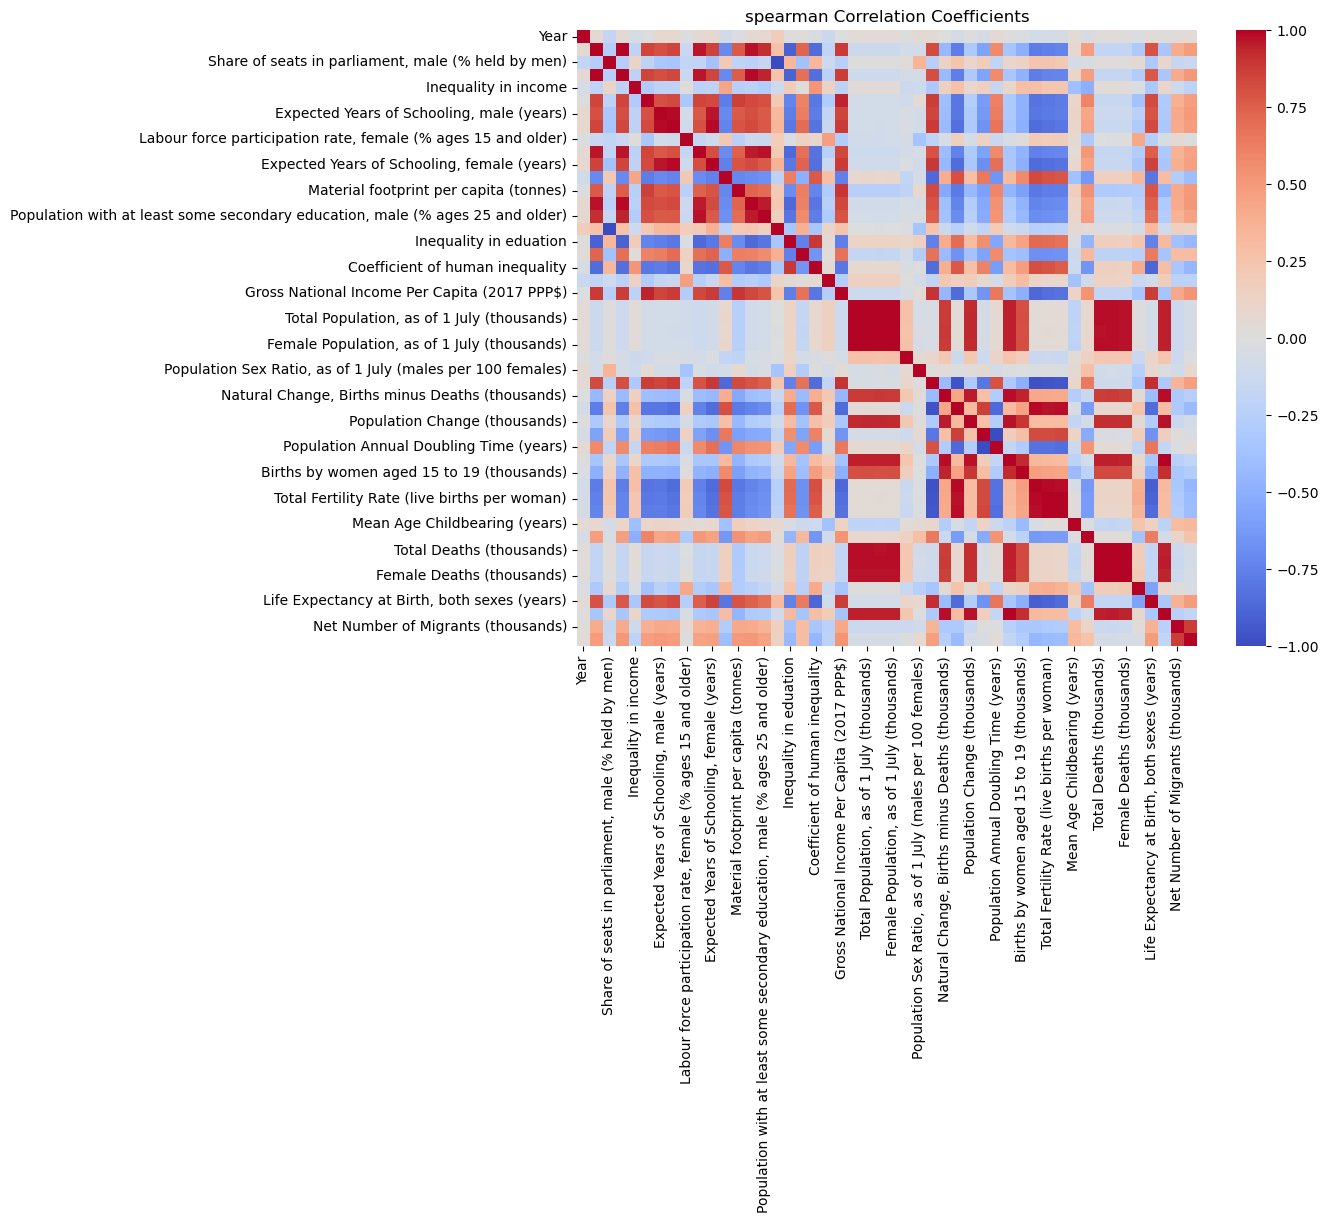

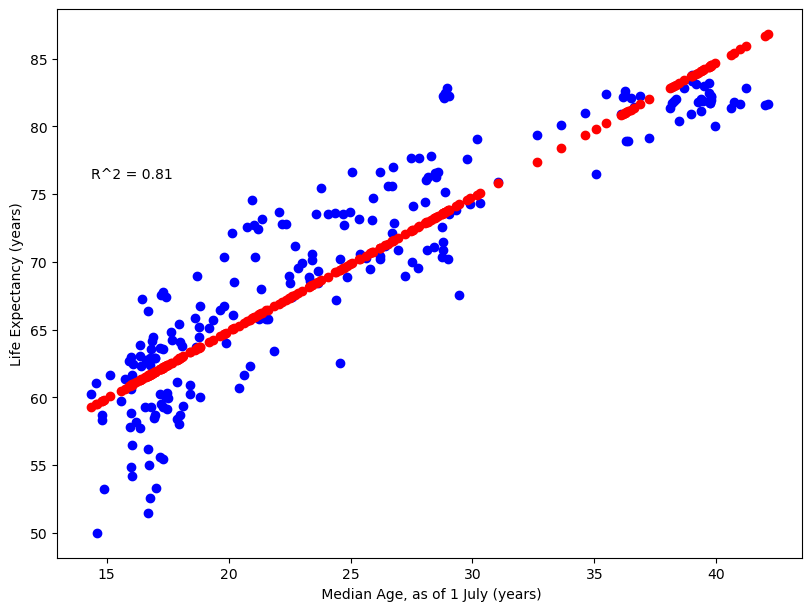

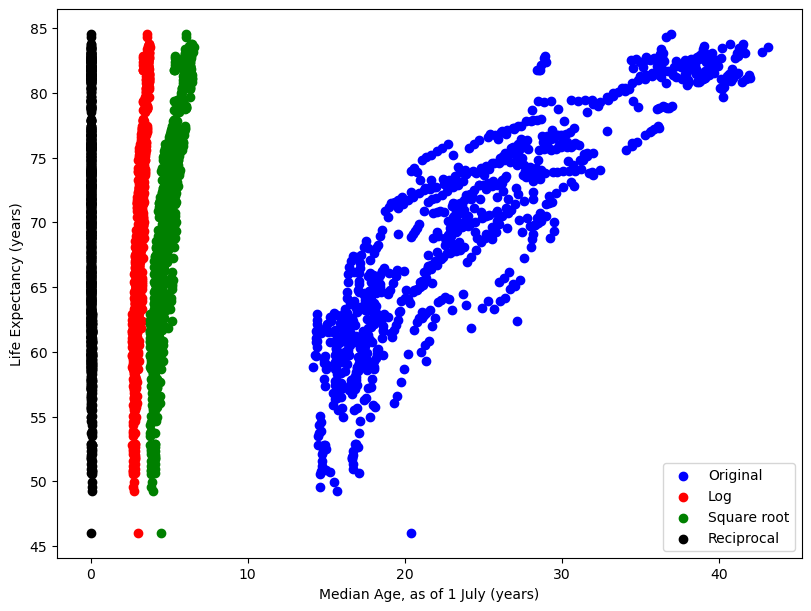

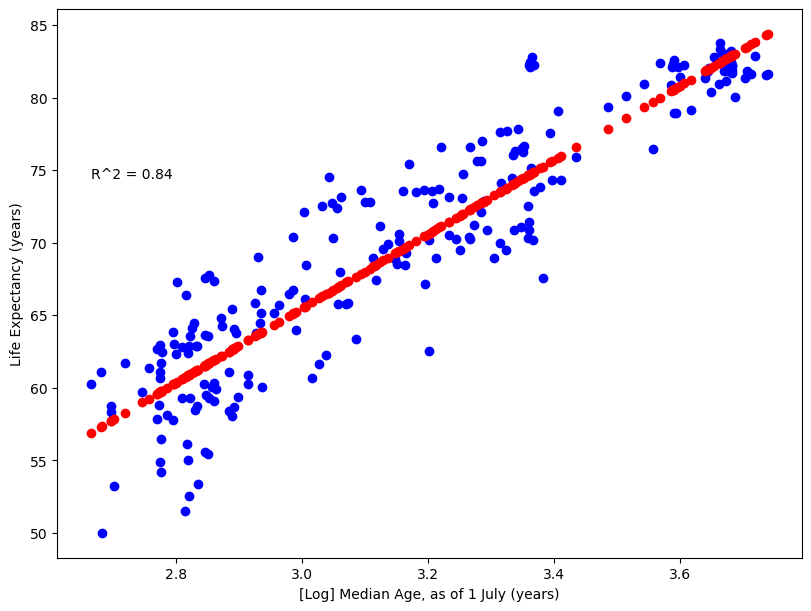

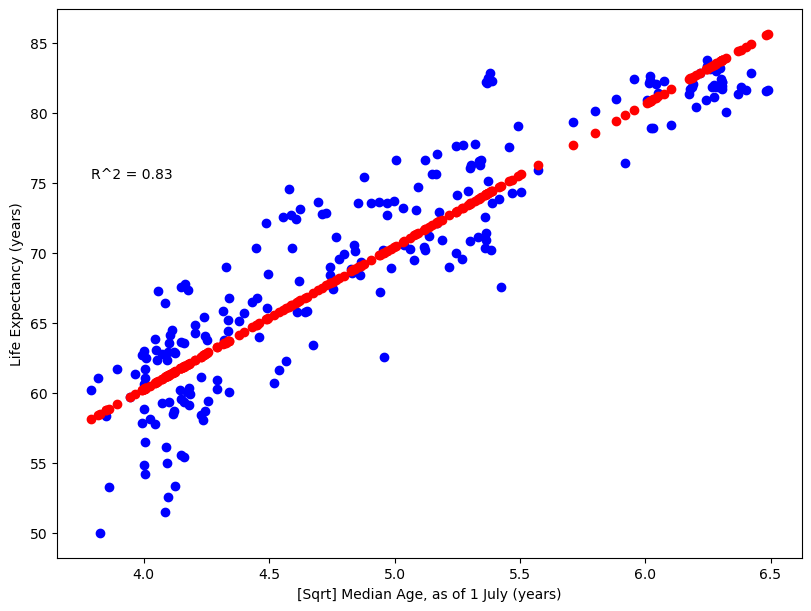

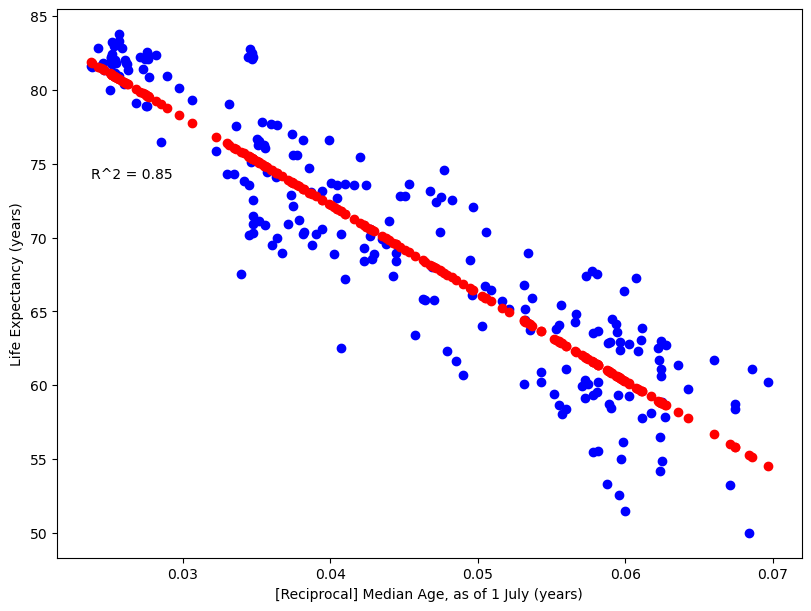

In [9]:
file_path = "../life_expectancy.csv"  
life_expectancy = pd.read_csv(file_path,  sep=',',).dropna()
LEB = 'Life Expectancy at Birth, both sexes (years)'
life_expectancy.set_index('Country', inplace=True)

life_expectancy_train, life_expectancy_test = train_test_split(life_expectancy, test_size=0.2)

X_train = life_expectancy_train.drop(LEB, axis=1) 
X_test =  life_expectancy_test.drop(LEB, axis=1) 
y_train = life_expectancy_train[LEB] 
y_test = life_expectancy_test[LEB]



strongest_pearson_correlation_variable, correlation_pearson = calculate_correlation(life_expectancy_train, LEB, 'pearson')
train_linear_regression_model(X_train[[strongest_pearson_correlation_variable]], X_test[[strongest_pearson_correlation_variable]], y_train, y_test, strongest_pearson_correlation_variable)

strongest_spearman_correlation_variable, correlation_spearman = calculate_correlation(life_expectancy_train.drop(strongest_pearson_correlation_variable, axis=1), LEB, 'spearman')
train_linear_regression_model(X_train[[strongest_spearman_correlation_variable]], X_test[[strongest_spearman_correlation_variable]], y_train, y_test, strongest_spearman_correlation_variable)
transform_variable(X_train, y_train, strongest_spearman_correlation_variable)
train_linear_regression_model(np.log(X_train[[strongest_spearman_correlation_variable]]), np.log(X_test[[strongest_spearman_correlation_variable]]), y_train, y_test, strongest_spearman_correlation_variable, "[Log]")
train_linear_regression_model(np.sqrt(X_train[[strongest_spearman_correlation_variable]]), np.sqrt(X_test[[strongest_spearman_correlation_variable]]), y_train, y_test, strongest_spearman_correlation_variable, "[Sqrt]")
train_linear_regression_model(1/(X_train[[strongest_spearman_correlation_variable]]), 1/(X_test[[strongest_spearman_correlation_variable]]), y_train, y_test, strongest_spearman_correlation_variable, "[Reciprocal]")
# Add transformed variable

correlation_before_transformation = calculate_specific_correlation = specific_correlation(life_expectancy_train, LEB, strongest_spearman_correlation_variable, 'pearson')
life_expectancy_train['transformed_variable'] = np.log(life_expectancy_train[[strongest_spearman_correlation_variable]])
correlation_after_transformation = calculate_specific_correlation = specific_correlation(life_expectancy_train, LEB, 'transformed_variable', 'pearson')
print("Correlation before tranformation: " + str(correlation_before_transformation) + ", correlation after transformation: " + str(correlation_after_transformation))

threshold = 0.85  
correlation_spearman_no_LEB = correlation_spearman.drop([LEB])

relevant_variables = correlation_spearman_no_LEB[abs(correlation_spearman_no_LEB['Life Expectancy at Birth, both sexes (years)']) > threshold].index.tolist()
train_linear_regression_model(X_train[relevant_variables], X_test[relevant_variables], y_train, y_test, relevant_variables)


